In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [3]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df_train.size

10692

In [9]:
df_train.shape

(891, 12)

In [10]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
type(df_train)

pandas.core.frame.DataFrame

In [12]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
# count of missing values in each feature
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
print(len(df_train))

891


### Finding the number of male and female survivors and non-survivors.

In [15]:
# 3.Determine the number of male and female survivors and non-survivors.
table = pd.crosstab(df_train['Survived'],df_train['Sex'])
print(table)

Sex       female  male
Survived              
0             81   468
1            233   109


In [16]:
# Male and Female counts
table.sum()

Sex
female    314
male      577
dtype: int64

In [17]:
# understanding the unique values

df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [18]:
alive = df_train.Survived.sum()
dead = len(df_train) - alive
print(alive,'people survived')
print(dead,'people dead')

342 people survived
549 people dead


<AxesSubplot:xlabel='Survived', ylabel='count'>

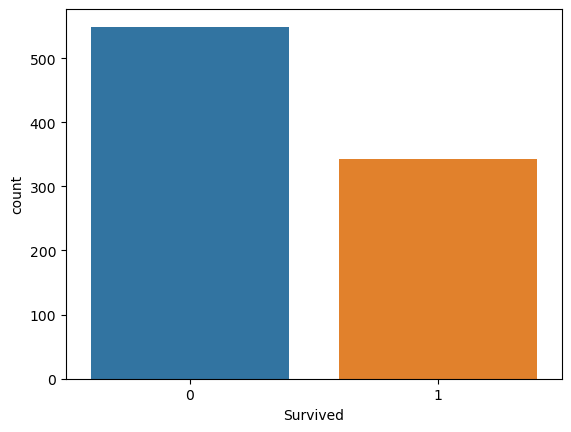

In [19]:
sns.countplot(x='Survived',data=df_train)

In [20]:
fst_cls_sur = df_train[(df_train['Survived'] > 0 ) & (df_train['Pclass'] >=1 )]
print("First class Survival Rate: ",fst_cls_sur['Survived'].sum())

First class Survival Rate:  342


In [21]:
fst_cls_sur = df_train[(df_train['Survived'] > 0 ) & (df_train['Pclass'] >=2 )]
print("Second class Survival Rate: ",fst_cls_sur['Survived'].sum())

Second class Survival Rate:  206


In [22]:
fst_cls_sur = df_train[(df_train['Survived'] > 0 ) & (df_train['Pclass'] >=3 )]
print("Second class Survival Rate: ",fst_cls_sur['Survived'].sum())

Second class Survival Rate:  119


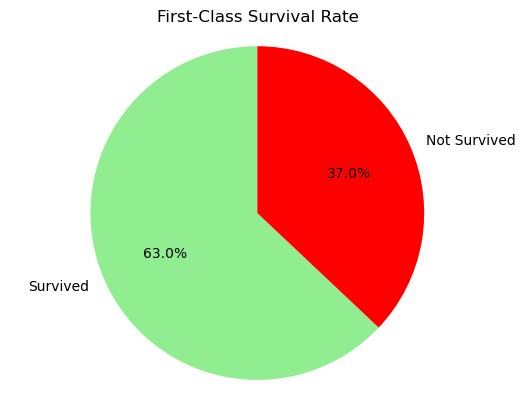

In [23]:
# Calculate the number of first-class passengers who survived and who did not survive
first_class_survived = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)].shape[0]
first_class_not_survived = df_train[(df_train['Pclass'] == 1) & (df_train['Survived'] == 0)].shape[0]
# Calculate the first-class survival rate
first_class_survival_rate = first_class_survived / (first_class_survived + first_class_not_survived)
# Create a pie chart to visualize the first-class survival rate
labels = ['Survived', 'Not Survived']
sizes = [first_class_survived, first_class_not_survived]
colors = ['lightgreen', 'red']
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('First-Class Survival Rate')
plt.show()

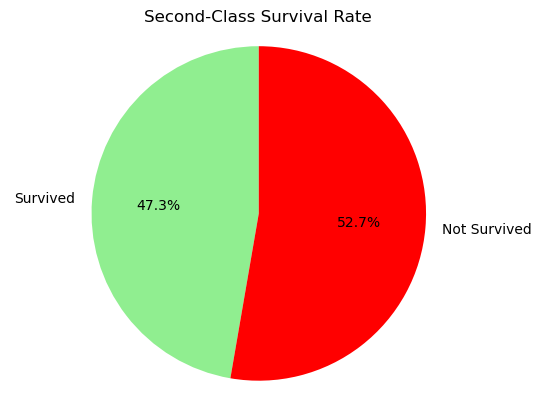

In [24]:
# Calculate the number of first-class passengers who survived and who did not survive
first_class_survived = df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)].shape[0]
first_class_not_survived = df_train[(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)].shape[0]
# Calculate the first-class survival rate
first_class_survival_rate = first_class_survived / (first_class_survived + first_class_not_survived)
# Create a pie chart to visualize the first-class survival rate
labels = ['Survived', 'Not Survived']
sizes = [first_class_survived, first_class_not_survived]
colors = ['lightgreen', 'red']
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Second-Class Survival Rate')
plt.show()

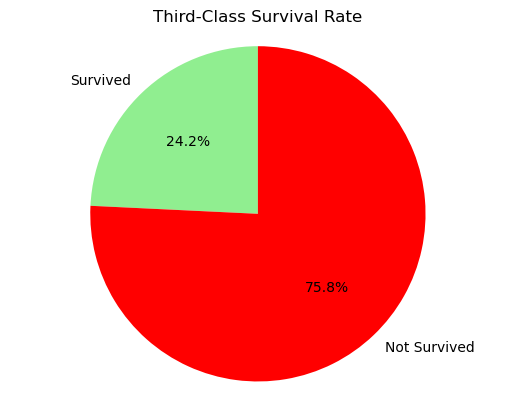

In [25]:
# Calculate the number of first-class passengers who survived and who did not survive
first_class_survived = df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)].shape[0]
first_class_not_survived = df_train[(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)].shape[0]
# Calculate the first-class survival rate
first_class_survival_rate = first_class_survived / (first_class_survived + first_class_not_survived)
# Create a pie chart to visualize the first-class survival rate
labels = ['Survived', 'Not Survived']
sizes = [first_class_survived, first_class_not_survived]
colors = ['lightgreen', 'red']
plt.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Third-Class Survival Rate')
plt.show()

### Figure out how many passengers did not have siblings on board.

In [26]:
no_siblings = df_train[df_train['SibSp'] == 0].shape[0]
print("Number of passengers who did not have siblings on board:", no_siblings)

Number of passengers who did not have siblings on board: 608


### Finding which priority was given to rescue in this disaster. Age, class, their on-board siblings, and their on-board parents are all factors to consider.

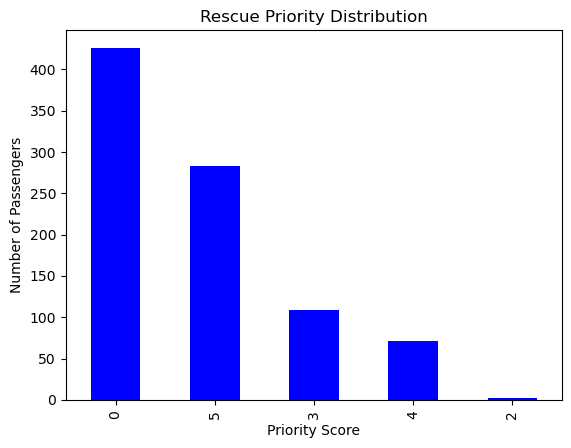

In [27]:
# Create a new column to represent the priority score
df_train['Priority'] = 0
# Assign a high priority score to children (age <= 12)
df_train.loc[df_train['Age'] <= 12, 'Priority'] = 2
# Assign a higher priority score to first-class passengers (Pclass == 1)
df_train.loc[df_train['Pclass'] == 1, 'Priority'] = 3
# Assign a higher priority score to passengers with at least 1 parent or child on board (Parch >= 1)
df_train.loc[df_train['Parch'] >= 1, 'Priority'] = 4
# Assign a higher priority score to passengers with at least 1 sibling or spouse on board (SibSp >= 1)
df_train.loc[df_train['SibSp'] >= 1, 'Priority'] = 5
# Create a bar chart to visualize the distribution of priority scores
priority_counts = df_train['Priority'].value_counts()
priority_counts.plot(kind='bar', color='blue')
plt.xlabel('Priority Score')
plt.ylabel('Number of Passengers')
plt.title('Rescue Priority Distribution')
plt.show()

In [28]:
women = df_train.loc[df_train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived: ", rate_women)

% of women who survived:  0.7420382165605095


In [29]:
men = df_train.loc[df_train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived: ", rate_men)

% of men who survived:  0.18890814558058924


### A pie chart for survived and non-survived women between the ages of 20 and 60.

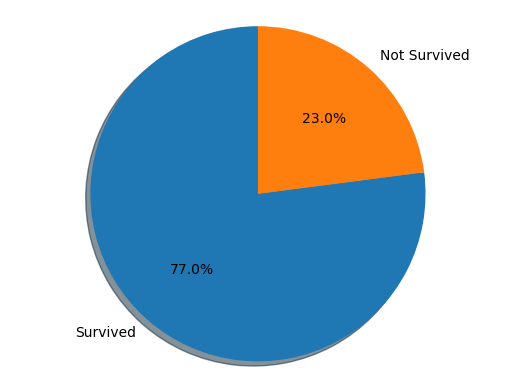

In [30]:
# Filter data for only women between the ages of 20 and 60
f_filtered = df_train[(df_train["Sex"] == "female") & (df_train["Age"] >= 20) & (df_train["Age"] <= 60)]
# Calculate the number of survived and non-survived women
survived = f_filtered[f_filtered["Survived"] == 1].shape[0]
not_survived = f_filtered[f_filtered["Survived"] == 0].shape[0]
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Survived', 'Not Survived'
sizes = [survived, not_survived]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.show()

In [31]:
df_train.groupby(['Embarked','Survived'])['PassengerId'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

In [32]:
df_train.groupby(['Pclass','Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [33]:
col_drop=['PassengerId','Name','Ticket','Cabin']

df_train.drop(col_drop,axis=1,inplace=True)

In [34]:
# filling the missing values

df_train['Embarked'].fillna('C',inplace=True)

In [35]:
# Converting categorical Values to numeric values

genders = {"male":0, "female":1}
df_train["Sex"] = df_train["Sex"].map(genders)

ports = {"S":0, "C":1, "Q":2}
df_train["Embarked"] = df_train["Embarked"].map(ports)

In [36]:
mean = df_train["Age"].mean()
std = df_train["Age"].std()

rand_age = np.random.randint(mean-std, mean+std, size = 177)
age_slice = df_train["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df_train["Age"] = age_slice

In [37]:
X=df_train.drop('Survived',axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Priority
0,3,0,22.0,1,0,7.2500,0,5
1,1,1,38.0,1,0,71.2833,1,5
2,3,1,26.0,0,0,7.9250,0,0
3,1,1,35.0,1,0,53.1000,0,5
4,3,0,35.0,0,0,8.0500,0,0


In [38]:
y=df_train['Survived']

In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
from sklearn.preprocessing import OneHotEncoder
df_train.select_dtypes(include=['object']).dtypes

Series([], dtype: object)

In [41]:
X.shape

(891, 8)

In [42]:
y.shape

(891,)

In [43]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state = 42)

In [44]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Priority
331,1,0,45.5,0,0,28.5000,0,3
733,2,0,23.0,0,0,13.0000,0,0
382,3,0,32.0,0,0,7.9250,0,0
704,3,0,26.0,1,0,7.8542,0,5
813,3,1,6.0,4,2,31.2750,0,5
...,...,...,...,...,...,...,...,...
106,3,1,21.0,0,0,7.6500,0,0
270,1,0,37.0,0,0,31.0000,0,3
860,3,0,41.0,2,0,14.1083,0,5
435,1,1,14.0,1,2,120.0000,0,5


In [45]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [46]:
rfc = RandomForestClassifier()

In [47]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Priority'],
      dtype='object')

In [48]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
y_pred = rfc.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy =", accuracy_score(y_test, y_pred),"\n")
print("Report:\n", classification_report(y_test, y_pred))

Accuracy = 0.8156424581005587 

Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [51]:
print(rfc.feature_importances_)

[0.076084   0.24606917 0.27258593 0.04107658 0.03427335 0.26289527
 0.03633341 0.03068229]


In [52]:
feature_name = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['FEATURE IMPORTANT VALUES'])
feature_name

,FEATURE IMPORTANT VALUES
Pclass,0.076084
Sex,0.246069
Age,0.272586
SibSp,0.041077
Parch,0.034273
Fare,0.262895
Embarked,0.036333
Priority,0.030682


Text(0, 0.5, 'Feature Important Score')

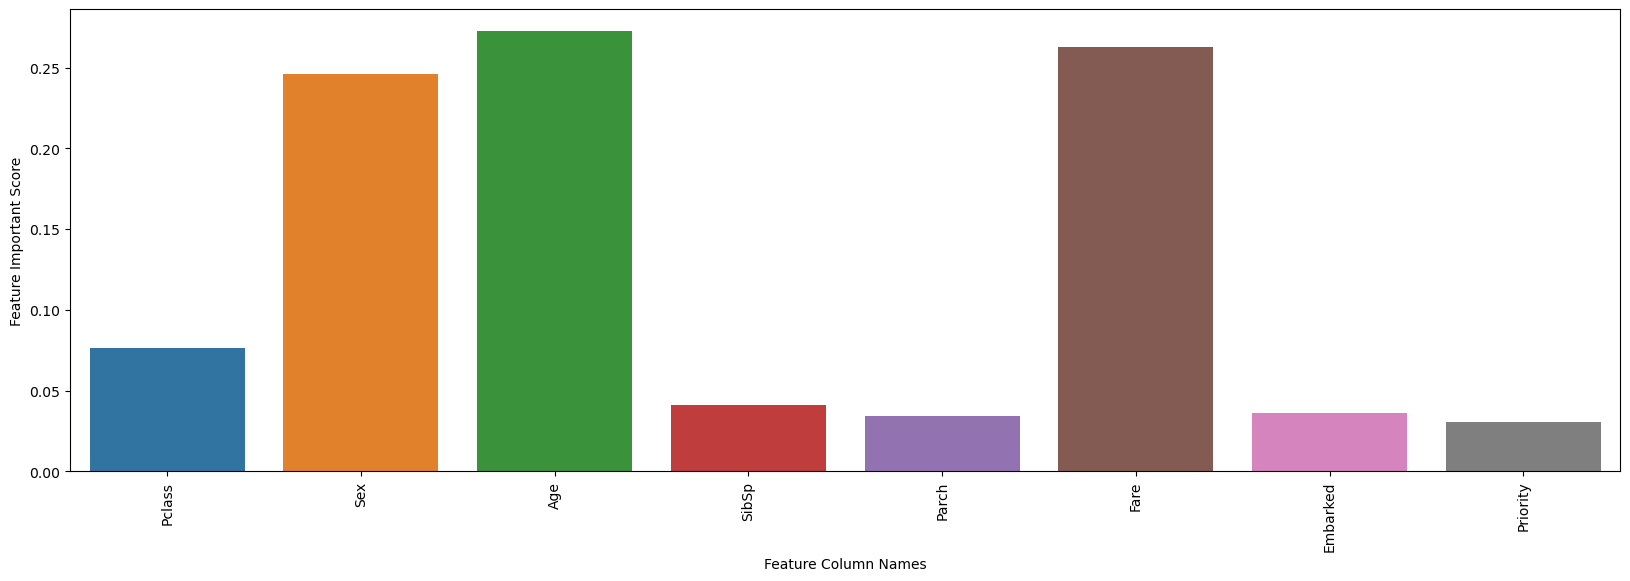

In [53]:
plt.figure(figsize=(20,6))
sns.barplot(x= feature_name.index, y=feature_name['FEATURE IMPORTANT VALUES'])
plt.xticks(rotation=90)
plt.xlabel('Feature Column Names')
plt.ylabel('Feature Important Score')

In [54]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [55]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_test})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
